Importing packages

In [ ]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

Loading Data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Analyzing data

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

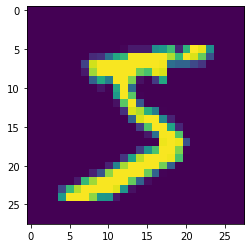

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)
Y_train[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Model creation

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

Train the model

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 208s 111ms/step - loss: 0.2206 - accuracy: 0.9518 - val_loss: 0.0968 - val_accuracy: 0.9707
Epoch 2/5
1875/1875 [==============================] - 197s 105ms/step - loss: 0.0670 - accuracy: 0.9799 - val_loss: 0.0970 - val_accuracy: 0.9702
Epoch 3/5
1875/1875 [==============================] - 192s 102ms/step - loss: 0.0482 - accuracy: 0.9852 - val_loss: 0.0753 - val_accuracy: 0.9776
Epoch 4/5
1875/1875 [==============================] - 193s 103ms/step - loss: 0.0341 - accuracy: 0.9890 - val_loss: 0.0869 - val_accuracy: 0.9774
Epoch 5/5
1875/1875 [==============================] - 190s 101ms/step - loss: 0.0249 - accuracy: 0.9922 - val_loss: 0.1398 - val_accuracy: 0.9699


Test the model

In [ ]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.13984718918800354, 0.9699000120162964]


In [ ]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 90ms/step
[[3.39234696e-10 8.45235120e-16 3.30143779e-09 5.24840580e-08
  2.31432589e-16 1.06332020e-10 2.07157962e-19 1.00000000e+00
  5.59530999e-09 6.87136681e-10]
 [3.20162141e-09 7.83842349e-12 1.00000000e+00 2.48565585e-10
  4.27766064e-17 3.09284434e-19 1.37549291e-10 4.60813551e-17
  3.39847213e-11 6.18604308e-16]
 [2.84423010e-07 9.99090910e-01 1.49158106e-04 4.53555371e-09
  1.29702588e-04 2.37032091e-05 1.52665291e-06 1.48486015e-05
  5.89822128e-04 1.86401401e-08]
 [1.00000000e+00 1.03318148e-14 4.84337193e-09 7.11009515e-11
  3.73388681e-11 5.24094982e-13 6.42570552e-10 3.93961207e-15
  5.19325416e-10 6.16333207e-10]]


In [ ]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
